In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('ant_img/tandem/2.png', 0)

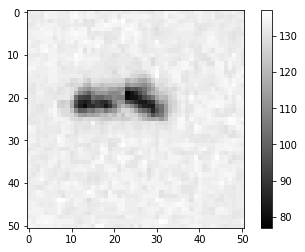

In [3]:
plt.imshow(img, 'gray')
plt.colorbar()

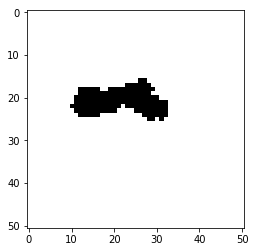

In [4]:
ret, th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
plt.imshow(th, 'gray')

In [5]:
mask = th == 0

In [6]:
normalized = img / 128. - 1.

In [9]:
masked = normalized * mask

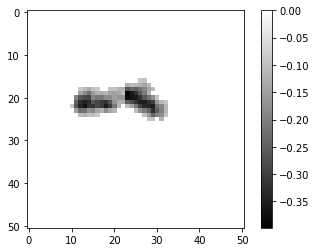

In [10]:
plt.imshow(masked, 'gray')
plt.colorbar()

In [11]:
im2, cont, _ = cv2.findContours(th, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [12]:
M = list(map(cv2.moments, cont))

In [13]:
cxs = list(map(lambda x: int(x['m10']/x['m00']), M))
cys = list(map(lambda x: int(x['m01']/x['m00']), M))

In [14]:
cx = sum(cxs) // len(cxs)
cy = sum(cys) // len(cys)

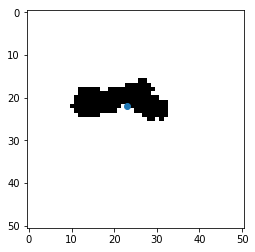

In [15]:
plt.imshow(im2, 'gray')
plt.scatter(cx, cy)

True

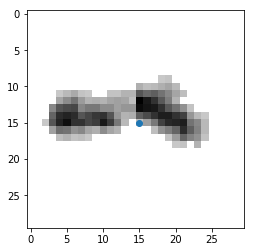

In [16]:
cropped = masked[cy-15:cy+15, cx-15:cx+15]
plt.imshow(cropped, 'gray')
plt.scatter(15, 15)
cv2.imwrite('ant_img_gs/tandem/2.png', cropped)

In [17]:
rows, cols = cropped.shape
mat = cv2.getRotationMatrix2D((cols/2, rows/2), np.random.rand()*360, 1)
rotated = cv2.warpAffine(cropped, mat, (cols, rows))

True

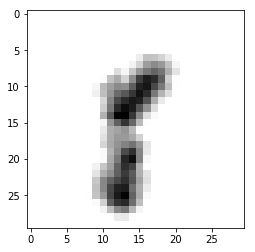

In [18]:
plt.imshow(rotated, 'gray')
cv2.imwrite('ant_img_gs/tandem/2_rot1.png', rotated)